In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

In [2]:
dfTrain = pd.read_csv('../../../DataSet/trip_train.csv', 
                      parse_dates=['start_date', 'end_date'], 
                      infer_datetime_format=True)

In [3]:
# Convierto a los SUSCRIBER en un 0
# Convierto a los CUSTOMER en un 1
subscriptionTypes = dfTrain.subscription_type.unique()
print subscriptionTypes

# Reemplazo por 0 y 1
dfTrain.subscription_type = dfTrain.subscription_type.astype('category', categories=subscriptionTypes).cat.codes

['Subscriber' 'Customer']


In [4]:
# GENERO TARGET, TRAIN
target = dfTrain.duration

trainDateData = {'start_month':dfTrain.start_date.dt.month,
                 'start_dayOfYear':dfTrain.start_date.dt.dayofyear,
                 'start_dayOfWeek':dfTrain.start_date.dt.dayofweek, 
                 'start_hourOfDay':dfTrain.start_date.dt.hour}

# Agrego columnas con la informacion de fechas a los dataframes
dfTrain = dfTrain[['start_station_id', 'subscription_type']].join(pd.DataFrame(trainDateData), how='outer')

In [10]:
eValues = [x for x in range(5, 101, 5)]
cvScores = []
for estimators in eValues:
    gb = GradientBoostingRegressor(n_estimators=estimators)
    scores = cross_val_score(gb, dfTrain, target, scoring='neg_mean_squared_error', n_jobs=-1)
    cvScores.append(-scores.mean())

El n_estimators optimo es 5


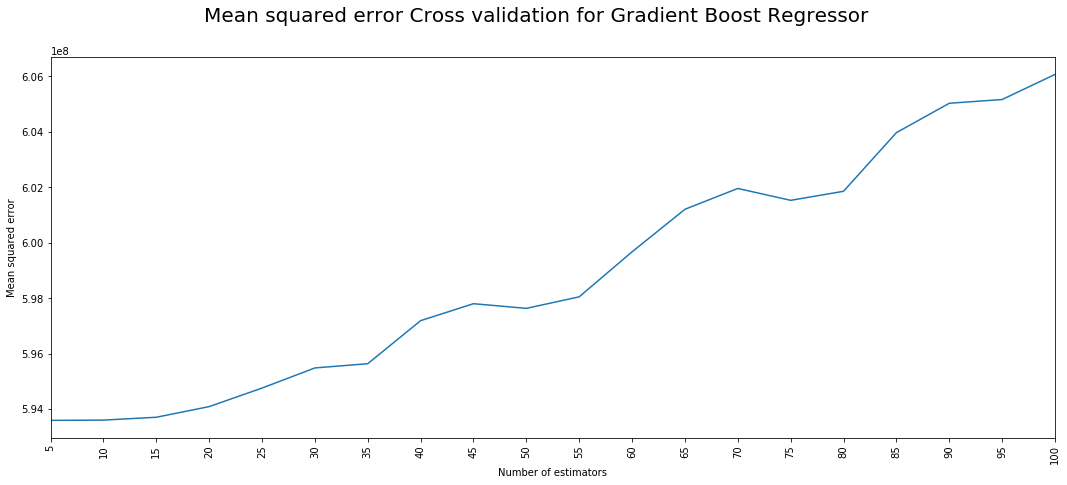

In [13]:
# Obtengo mejor estimator
eOptimo = eValues[cvScores.index(min(cvScores))]
print "El n_estimators optimo es %d" % eOptimo

# Plot
plt.figure().suptitle('Mean squared error Cross validation for Gradient Boost Regressor', fontsize=20)
plt.plot(eValues, cvScores)
plt.xlabel('Number of estimators')
plt.ylabel('Mean squared error')
plt.xlim(eValues[0], eValues[-1])
plt.xticks(eValues, eValues, rotation='vertical')
plt.gcf().set_size_inches(18, 7, forward=True)
plt.show()